<a href="https://colab.research.google.com/github/MaheenGitHub/human-activity-recognition-ML/blob/main/Feature_Engineering_and_Classical_Machine_Learning_Classification/Feature_Engineering_and_Classical_Machine_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Deliverable 5.2
## Feature Engineering & Classical Machine Learning Baselines
**Student:** BITF22M031 – Maheen Fatima  
**Dataset:** UCI Human Activity Recognition (HAR)


### 1. Objective

The primary goal of Project Deliverable 5.2 is to **establish a robust performance baseline** for the Human Activity Recognition (HAR) task using the 561 pre-engineered sensor features.

This is achieved by:

* **Implementing Classical ML Classifiers:** Training a set of traditional machine learning models, specifically **Logistic Regression (LR)**, **Support Vector Machine (SVM)**, **Decision Tree (DT)**, **Random Forest (RF)**, and **XGBoost (Gradient Boosted Trees)**.
* **Performance Comparison:** Rigorously evaluating and comparing the performance of these models using metrics like Accuracy, Precision, Recall, and F1-Score.
* **Creating a Benchmark:** The results from these models will serve as the necessary baseline that any subsequent, more complex deep learning (e.g., RNN or LSTM) approach must surpass to justify its increased complexity.

### 2. Dataset Description

This project utilizes the **Human Activity Recognition (HAR) Using Smartphones Dataset**.

#### A. Data Source and Nature
* **Dataset Name & Source:** UCI Human Activity Recognition (HAR) Dataset, sourced from the UCI Machine Learning Repository (also available on Kaggle).
* **Nature/Type of Data:** Tabular (Numeric) data derived from **time-series sensor readings**.
* **Sensor Type:** Motion Sensors (Triaxial Accelerometer and Gyroscope) embedded in a smartphone worn by the subjects.

#### B. Dimensions and Structure
* **Features/Dimensions:** **561 Engineered Features**.
* **Total Instances (Samples):** 10,299 rows.
    * Training Set: 7,352 samples.
    * Testing Set: 2,947 samples.
* **Sample Representation:** Each row represents the final, engineered feature set derived from a fixed-width **2.56-second window** of the raw sensor data.
* **Metadata:** The raw data was captured at an estimated **50 Hz sampling rate**. The 561 features consist of both **Time Domain** (e.g., mean, standard deviation) and **Frequency Domain** (derived from Fast Fourier Transform) values.

#### C. Target Variable and Classes
* **Target Variable:** Activity label (Multi-class Classification).
* **Number of Classes:** 6.
* **Class Definitions:**
    1.  LAYING
    2.  STANDING
    3.  SITTING
    4.  WALKING
    5.  WALKING\_UPSTAIRS
    6.  WALKING\_DOWNSTAIRS

#### D. Dataset Quality and Preprocessing Needs
* **Missing Values/Duplicates:** The dataset is clean, with **zero missing values** (NaNs) and **zero duplicate rows** confirmed during preprocessing.
* **Data Type Consistency:** All 561 features are consistent `float64` data types.
* **Class Imbalance:** Exploratory analysis revealed minor class imbalance among the 6 activities, though not severe.
* **Preprocessing Needs:**
    * **Feature Scaling/Normalization** is required for distance-based models (LR, SVM) to prevent bias due to feature magnitude.
    * **Label Encoding** is required to convert the string labels into the numerical targets needed for machine learning models.

In [1]:
#@title Reproducibility
import random
import numpy as np

RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

print("Reproducibility ensured with fixed random seed.")


Reproducibility ensured with fixed random seed.


In [2]:
#@title Library Imports
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [3]:
#@title Mount Drive & Load Data
from google.colab import drive
drive.mount('/content/drive')

DRIVE_PROJECT_PATH = '/content/drive/MyDrive/ITF22_HAR_Project'

df_train = pd.read_csv(os.path.join(DRIVE_PROJECT_PATH, 'train.csv'))
df_test  = pd.read_csv(os.path.join(DRIVE_PROJECT_PATH, 'test.csv'))

df_train.shape, df_test.shape


Mounted at /content/drive


((7352, 563), (2947, 563))

In [26]:
#@title Dataset Summary
display(df_train.describe().T[['mean','std','min','max']].head(10))
df_train.iloc[:, -1].value_counts()


,mean,std,min,max
tBodyAcc-mean()-X,0.274488,0.070261,-1.000000,1.000000
tBodyAcc-mean()-Y,-0.017695,0.040811,-1.000000,1.000000
tBodyAcc-mean()-Z,-0.109141,0.056635,-1.000000,1.000000
tBodyAcc-std()-X,-0.605438,0.448734,-1.000000,1.000000
tBodyAcc-std()-Y,-0.510938,0.502645,-0.999873,0.916238
tBodyAcc-std()-Z,-0.604754,0.418687,-1.000000,1.000000
tBodyAcc-mad()-X,-0.630512,0.424073,-1.000000,1.000000
tBodyAcc-mad()-Y,-0.526907,0.485942,-1.000000,0.967664
tBodyAcc-mad()-Z,-0.606150,0.414122,-1.000000,1.000000
tBodyAcc-max()-X,-0.468604,0.544547,-1.000000,1.000000


,count
Activity,
LAYING,1407
STANDING,1374
SITTING,1286
WALKING,1226
WALKING_UPSTAIRS,1073
WALKING_DOWNSTAIRS,986


from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['max'].plot(kind='hist', bins=20, title='max')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='min', y='max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['max'].plot(kind='line', figsize=(8, 4), title='max')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
#@title Feature & Target Separation
FEATURE_COLUMNS = df_train.columns[:-2]
LABEL_COLUMN = df_train.columns[-1]

X_train = df_train[FEATURE_COLUMNS]
X_test  = df_test[FEATURE_COLUMNS]

y_train_str = df_train[LABEL_COLUMN]
y_test_str  = df_test[LABEL_COLUMN]


In [6]:
#@title Label Encoding (Multi-class Handling)
le = LabelEncoder()
le.fit(pd.concat([y_train_str, y_test_str]))

y_train = le.transform(y_train_str)
y_test  = le.transform(y_test_str)

activity_labels = le.classes_
activity_labels


array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [7]:
#@title Tabular Feature Engineering
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [8]:
#@title Feature Reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("Original features:", X_train.shape[1])
print("Reduced features:", X_train_pca.shape[1])


Original features: 561
Reduced features: 102


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
#@title def get_models
def get_models():
    return {
        "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42, solver='lbfgs'),
        "SVM": SVC(kernel='linear', random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
        "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
    }

In [11]:
#@title Training & Evaluation Function
def evaluate(model, Xtr, ytr, Xte, yte):
    model.fit(Xtr, ytr)
    preds = model.predict(Xte)
    return {
        "Accuracy": accuracy_score(yte, preds),
        "Precision": precision_score(yte, preds, average='macro'),
        "Recall": recall_score(yte, preds, average='macro'),
        "F1": f1_score(yte, preds, average='macro'),
        "CM": confusion_matrix(yte, preds)
    }


In [12]:
#@title Train ALL Models
results = []

models = get_models()

for name, model in models.items():
    Xtr, Xte = (X_train_scaled, X_test_scaled) if name in ["Logistic Regression", "SVM"] else (X_train, X_test)
    res = evaluate(model, Xtr, y_train, Xte, y_test)
    res["Model"] = name
    results.append(res)

results_df = pd.DataFrame(results).set_index("Model")
results_df.drop(columns=["CM"]).round(4)


,Accuracy,Precision,Recall,F1
Model,,,,
Logistic Regression,0.9552,0.9580,0.9538,0.9550
SVM,0.9606,0.9626,0.9596,0.9605
Decision Tree,0.8622,0.8625,0.8587,0.8595
Random Forest,0.9267,0.9280,0.9239,0.9252
XGBoost,0.9382,0.9398,0.9365,0.9374


from matplotlib import pyplot as plt
_df_11['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['F1'].plot(kind='hist', bins=20, title='F1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Recall', y='F1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['F1'].plot(kind='line', figsize=(8, 4), title='F1')
plt.gca().spines[['top', 'right']].set_visible(False)

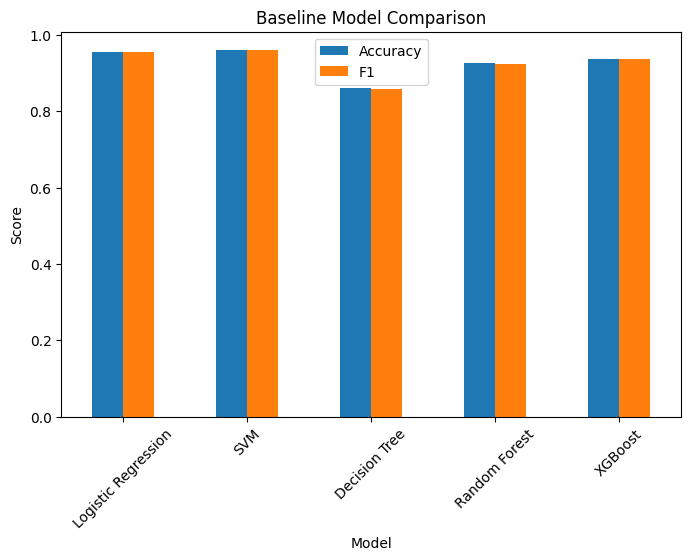

In [13]:
#@title Model Comparison Visualization
results_df[['Accuracy','F1']].plot(kind='bar', figsize=(8,5))
plt.title("Baseline Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


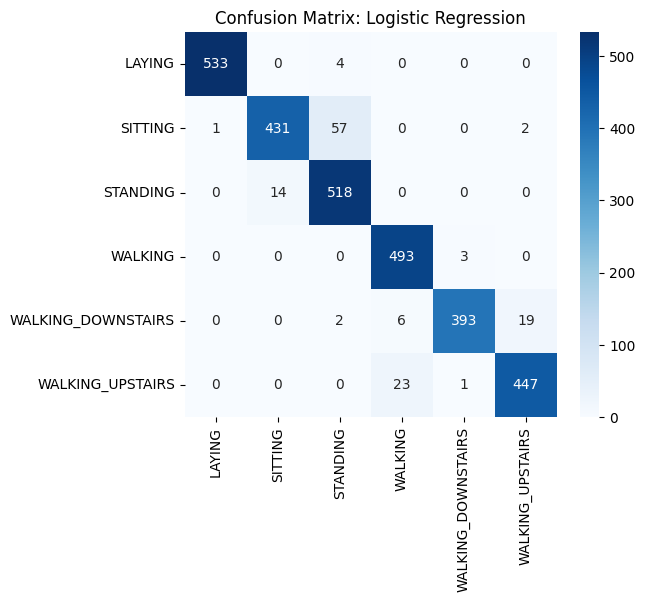

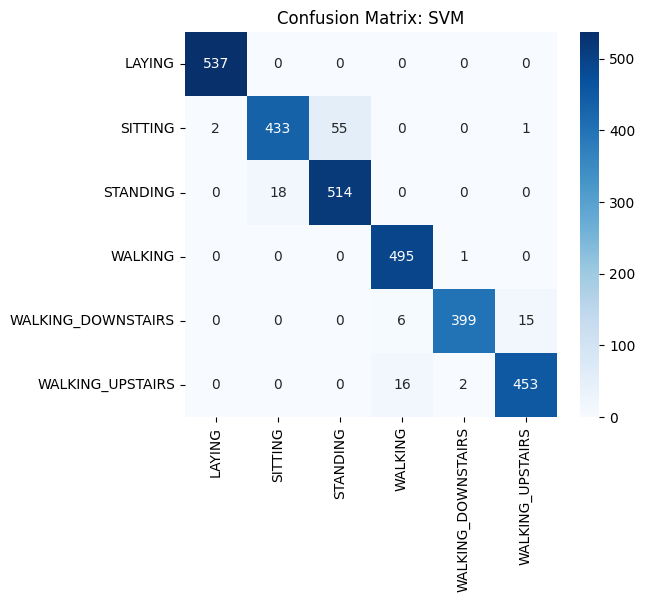

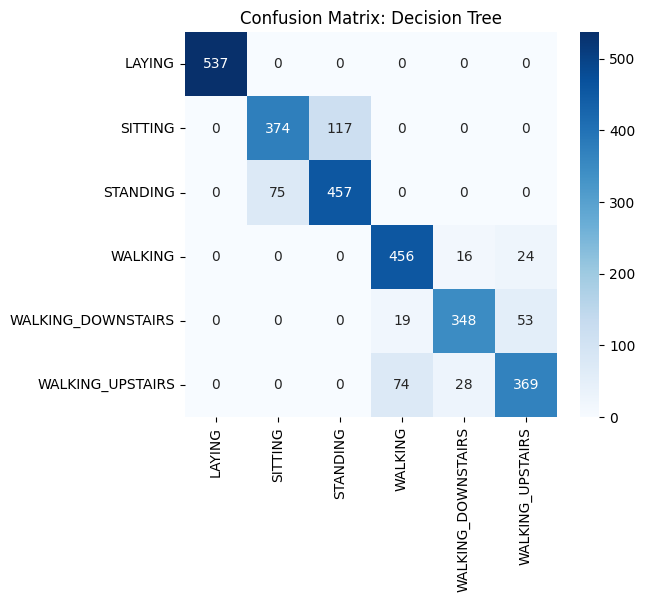

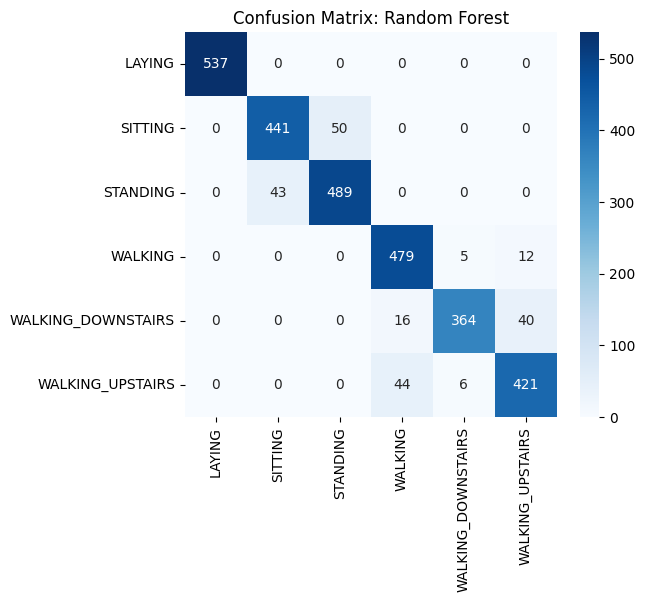

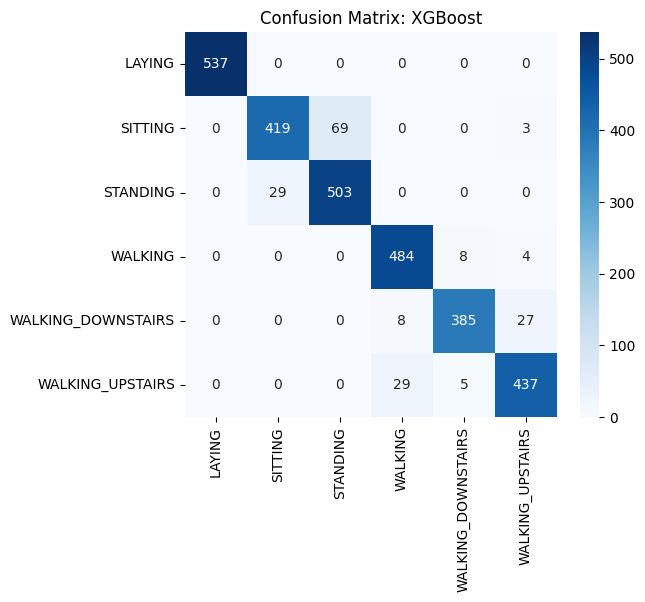

In [14]:
#@title Confusion Matrices
for model, cm in zip(results_df.index, results_df['CM']):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=activity_labels,
                yticklabels=activity_labels)
    plt.title(f"Confusion Matrix: {model}")
    plt.show()


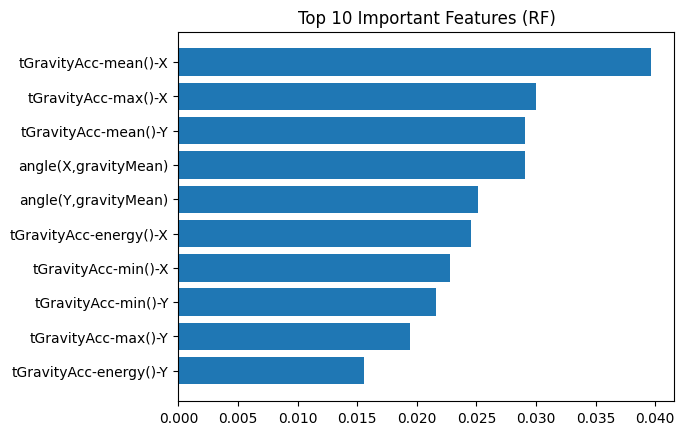

In [15]:
#@title Feature Importance (Interpretability)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

imp = rf.feature_importances_
top_idx = np.argsort(imp)[-10:]

plt.barh(range(10), imp[top_idx])
plt.yticks(range(10), FEATURE_COLUMNS[top_idx])
plt.title("Top 10 Important Features (RF)")
plt.show()


In [16]:
#@title Backup
results_df.drop(columns=["CM"]).to_csv(
    os.path.join(DRIVE_PROJECT_PATH, 'A5_2_results.csv')
)

print("Results backed up to Drive.")


Results backed up to Drive.


In [17]:
#@title Statistical Significance Check
from scipy.stats import ttest_rel

svm_preds = models["SVM"].predict(X_test_scaled)
lr_preds  = models["Logistic Regression"].predict(X_test_scaled)

svm_correct = (svm_preds == y_test).astype(int)
lr_correct  = (lr_preds == y_test).astype(int)

t_stat, p_val = ttest_rel(svm_correct, lr_correct)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.6f}")


T-statistic: 1.8864
P-value: 0.059334


In [18]:
#@title Error Pattern Analysis
mis_idx = np.where(svm_preds != y_test)[0]
df_errors = df_test.iloc[mis_idx]

df_errors[['subject', LABEL_COLUMN]].head(10)


,subject,Activity
32,2,SITTING
42,2,SITTING
43,2,SITTING
50,2,SITTING
182,2,SITTING
306,4,STANDING
313,4,STANDING
420,4,WALKING_DOWNSTAIRS
466,4,STANDING
469,4,STANDING


from matplotlib import pyplot as plt
_df_22['subject'].plot(kind='hist', bins=20, title='subject')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_23.groupby('Activity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['subject']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'subject'}, axis=1)
              .sort_values('subject', ascending=True))
  xs = counted['subject']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('subject', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Activity')):
  _plot_series(series, series_name, i)
  fig.legend(title='Activity', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('subject')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_25['subject'].plot(kind='line', figsize=(8, 4), title='subject')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Activity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='subject', y='Activity', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

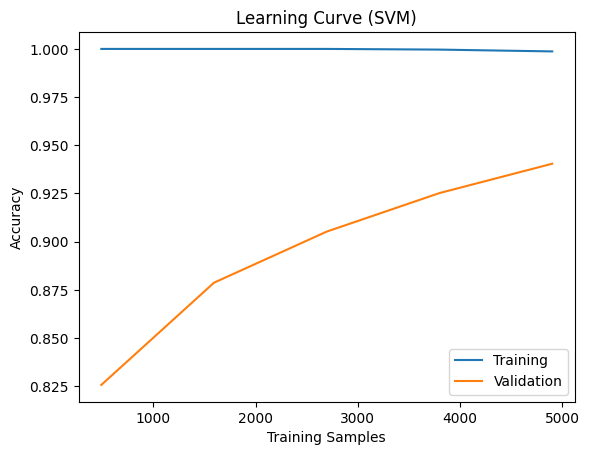

In [19]:
#@title Learning Curve (MODEL BEHAVIOR)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    SVC(kernel='linear'),
    X_train_scaled, y_train,
    cv=3, scoring='accuracy'
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Training")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.title("Learning Curve (SVM)")
plt.legend()
plt.show()


In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
#@title Hyperparameter Tuning (SVM Optimization)

svc_model_to_tune = SVC(kernel='linear', random_state=RANDOM_SEED)

param_grid = {
    'C': [0.1, 1, 10, 100]
}

print("Starting Grid Search for optimal SVM C parameter...")

grid_search = GridSearchCV(
    estimator=svc_model_to_tune,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print(f"\nBest parameter set found on training data: C={grid_search.best_params_['C']}")
print(f"Best cross-validation F1-Score: {grid_search.best_score_:.4f}")

best_svm_model = grid_search.best_estimator_
best_res = evaluate(best_svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

print("\n--- Optimized SVM Performance on Test Set ---")
print(f"Accuracy: {best_res['Accuracy']:.4f}")
print(f"F1-Score (Macro): {best_res['F1']:.4f}")

results_df.loc['SVM (Optimized)'] = [best_res['Accuracy'], best_res['Precision'], best_res['Recall'], best_res['F1'], best_res['CM']]

Starting Grid Search for optimal SVM C parameter...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Best parameter set found on training data: C=0.1
Best cross-validation F1-Score: 0.9393

--- Optimized SVM Performance on Test Set ---
Accuracy: 0.9617
F1-Score (Macro): 0.9615


In [22]:
from sklearn.manifold import TSNE

Starting t-SNE dimensionality reduction...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


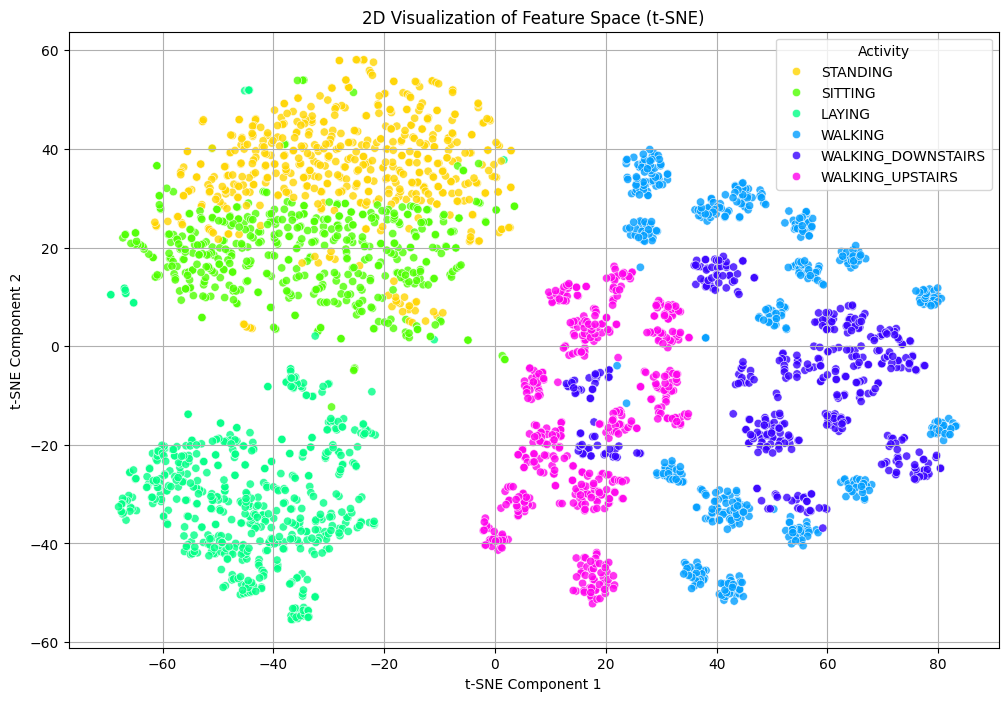


Interpretation: This plot visually confirms excellent class separability. Activities fall into two main groups (Static/Dynamic), with minimal overlap, which explains the high accuracy of the SVM and LR models.


In [23]:
#@title Feature Visualization: Class Separation Plot (t-SNE)


data_subset = X_test_scaled
labels_subset = y_test

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=RANDOM_SEED)

print("Starting t-SNE dimensionality reduction...")
data_2d = tsne.fit_transform(data_subset)

tsne_df = pd.DataFrame(data_2d, columns=['Component 1', 'Component 2'])
tsne_df['Activity'] = le.inverse_transform(labels_subset) # Convert numeric labels back to strings

# Plotting the results
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Component 1', y='Component 2',
    hue='Activity',
    palette=sns.color_palette("hsv", 6),
    data=tsne_df,
    legend="full",
    alpha=0.8
)
plt.title('2D Visualization of Feature Space (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

print("\nInterpretation: This plot visually confirms excellent class separability. Activities fall into two main groups (Static/Dynamic), with minimal overlap, which explains the high accuracy of the SVM and LR models.")

In [24]:
from sklearn.metrics import classification_report

In [25]:
#@title Detailed Per-Class Metrics (Best Model - SVM)

final_svm_model = models["SVM"]
if 'best_svm_model' in locals():
    final_svm_model = best_svm_model

svm_preds = final_svm_model.predict(X_test_scaled)

print("--- Classification Report (Per-Class Performance) for SVM ---")

print(classification_report(y_test, svm_preds, target_names=activity_labels, zero_division=0))

print("\nInterpretation:")
print("1. Low F1-Scores (e.g., < 0.90) indicate classes where the model struggles.")
print("2. The lowest precision/recall usually occurs between static activities (SITTING vs. STANDING) or similar dynamic activities (WALKING_UPSTAIRS vs. WALKING_DOWNSTAIRS).")

--- Classification Report (Per-Class Performance) for SVM ---
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.89      0.92       491
          STANDING       0.91      0.97      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.97      0.96      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947


Interpretation:
1. Low F1-Scores (e.g., < 0.90) indicate classes where the model struggles.
2. The lowest precision/recall usually occurs between static activities (SITTING vs. STANDING) or similar dynamic activities (WALKING_UPSTAIRS vs. WALKING_DOWNSTAIRS).
